In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib
%matplotlib inline
import geopandas as gpd

In [3]:
file_names = os.listdir('cleaned_data')
data_dict = {}
for file in file_names:
    data_dict[file[:6]] = pd.read_csv('cleaned_data/' + file)

In [4]:
pf2015 = data_dict['2015pf']

In [5]:
pc2015 = data_dict['2015pc']

In [6]:
pc_columns = ['EIN', 'ADDRESS', 'BLOCK', 'ACTIV1', 'ACTIV2', 'ACTIV3', 'CENSUSTRACT', 'CITY', 'COMPENS', 'COMPENSP',
             'CONT', 'CLASSCD', ]

In [7]:
def histogram(dataframe, column):
    Nbins = 30
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

In [8]:
pc2015.TOTREV.describe()

count    2.767000e+03
mean     2.981915e+06
std      4.520304e+07
min     -3.965770e+05
25%      3.298050e+04
50%      1.102400e+05
75%      4.906205e+05
max      2.202766e+09
Name: TOTREV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc195528358>]],
      dtype=object)

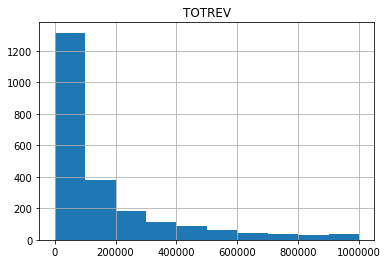

In [9]:
pc2015.hist(column = 'TOTREV', range = (0, 1000000))

    

In [10]:
pc2015.loc[pc2015['TOTREV'] > 10000000, ['ADDRESS', 'NAME', 'TOTREV']]

,ADDRESS,NAME,TOTREV
80,200 EASTERN PKWY,BROOKLYN INSTITUTE OF ARTS AND SCIENCES BROOKL...,3.192303e+07
83,4701 111TH ST,NEW YORK HALL OF SCIENCE,2.022672e+07
86,30 LAFAYETTE AVE,BROOKLYN ACADEMY OF MUSIC INC,5.879945e+07
119,45 WATER ST,ST ANNS WAREHOUSE INC,1.270941e+07
218,248 W 35TH ST FL 10,FRACTURED ATLAS INC,2.338730e+07
236,INC 300 EAST 51ST STREET STE 8G,FRIENDS OF UNITED HATZALAH INC,1.259106e+07
280,70 LINCOLN CENTER PLAZA,SCHOOL OF AMERICAN BALLET INC,2.658959e+07
288,1 LIBERTY PLAZA 20TH FL,CHANCELLOR MASTERS AND SCHOLARS OF THE UNIVERS...,2.202766e+09
294,1 E 70TH ST SERVICE ENT,FRICK COLLECTION,3.773621e+07
295,1000 FIFTH AVENUE,THE METROPOLITAN MUSEUM OF ART,4.737445e+08


In [11]:
NYZIPS = [10453.0, 10457.0, 10460.0, 10458.0, 10467.0, 10468.0, 10451.0, 10452.0, 10456.0, 10454.0, 
10455.0, 10459.0, 10474.0, 10463.0, 10471.0, 10466.0, 10469.0, 10470.0, 10475.0, 10461.0, 
10462.0, 10464.0, 10465.0, 10472.0, 10473.0, 11212.0, 11213.0, 11216.0, 11233.0, 11238.0, 
11209.0, 11214.0, 11228.0, 11204.0, 11218.0, 11219.0, 11230.0, 11234.0, 11236.0, 11239.0, 
11223.0, 11224.0, 11229.0, 11235.0, 11201.0, 11205.0, 11215.0, 11217.0, 11231.0, 11203.0, 
11210.0, 11225.0, 11226.0, 11207.0, 11208.0, 11211.0, 11222.0, 11220.0, 11232.0, 11206.0, 
11221.0, 11237.0, 10026.0, 10027.0, 10030.0, 10037.0, 10039.0, 10001.0, 10011.0, 10018.0, 
10019.0, 10020.0, 10036.0, 10029.0, 10035.0, 10010.0, 10016.0, 10017.0, 10022.0, 10012.0, 
10013.0, 10014.0, 10004.0, 10005.0, 10006.0, 10007.0, 10038.0, 10280.0, 10002.0, 10003.0, 
10009.0, 10021.0, 10028.0, 10044.0, 10065.0, 10075.0, 10128.0, 10023.0, 10024.0, 10025.0, 
10031.0, 10032.0, 10033.0, 10034.0, 10040.0, 11361.0, 11362.0, 11363.0, 11364.0, 11354.0, 
11355.0, 11356.0, 11357.0, 11358.0, 11359.0, 11360.0, 11365.0, 11366.0, 11367.0, 11412.0, 
11423.0, 11432.0, 11433.0, 11434.0, 11435.0, 11436.0, 11101.0, 11102.0, 11103.0, 11104.0, 
11105.0, 11106.0, 11374.0, 11375.0, 11379.0, 11385.0, 11691.0, 11692.0, 11693.0, 11694.0, 
11695.0, 11697.0, 11004.0, 11005.0, 11411.0, 11413.0, 11422.0, 11426.0, 11427.0, 11428.0, 
11429.0, 11414.0, 11415.0, 11416.0, 11417.0, 11418.0, 11419.0, 11420.0, 11421.0, 11368.0, 
11369.0, 11370.0, 11372.0, 11373.0, 11377.0, 11378.0, 10302.0, 10303.0, 10310.0, 10306.0, 
10307.0, 10308.0, 10309.0, 10312.0, 10301.0, 10304.0, 10305.0, 10314.0, 10119.0, 11249.0, 
10008.0, 10279.0, 10271.0, 10041.0, 10163.0, 10107.0, 10108.0, 10113.0, 10123.0, 11351.0, 
10115.0, 10276.0, 10150.0, 11439.0, 11451.0, 11202.0, 10170.0, 11424.0, 10185.0, 10122.0, 
11690.0, 11242.0, 11352.0, 10116.0, 10167.0, 10282.0, 11247.0, 10278.0, 10121.0, 10155.0, 
10168.0, 10281.0, 10118.0, 10110.0, 10158.0, 10159.0, 10165.0, 11241.0, 10156.0, 10178.0, 
10120.0, 10105.0, 10104.0, 10175.0, 10101.0, 10153.0, 10268.0, 10173.0, 10111.0, 10311.0, 
10166.0, 10069.0, 10272.0, 10112.0, 10176.0, 10162.0, 10174.0, 10177.0, 10151.0, 11430.0, 
11386.0, 10106.0, 10169.0, 10154.0, 11109.0, 11380.0, 10129.0, 10103.0, 10045.0, 10171.0, 
10286.0, 11371.0, 11120.0, 11431.0, 10274.0, 11243.0, 11240.0, 10015.0, 10048.0, 10249.0, 
10285.0, 10152.0, 10270.0, 10102.0, 10043.0, 10172.0, 10109.0, 10081.0, 11252.0, 10055.0, 
10313.0, 11251.0, 10125.0, 10133.0, 10117.0, 10138.0, 10164.0, 10292.0, 10260.0, 10072.0, 
10080.0, 10179.0, 10021, 10065, 11219, 10022, 10003, 10028, 10122, 
11217, 10017, 11361, 10013, 10004, 10005, 10001, 10168, 10016, 11210, 
10031, 11223, 10036, 10018, 11211, 10024, 10019, 10119, 11204, 10023, 
10128, 11106, 11234, 11120, 11375, 10008, 10274, 11694, 10165, 10025, 
11249, 10173, 10158, 10471, 10309, 10312, 11427, 10014, 10010, 11230, 
10170, 11205, 11215, 10177, 11201, 10020, 11238, 11231, 10111, 10461, 
10150, 10306, 11214, 10007, 11224, 10118, 10153, 10110, 10012, 10163, 
11218, 11373, 10107, 11367, 11220, 10032, 10075, 10115, 11235, 10011, 
11415, 10027, 10463, 10002, 10026, 11101, 10120, 10103, 10055, 10039, 
11245.0, 11256.0, 11425.0, 10046.0, 10199.0, 10123, 10009, 11378, 11229, 10006, 
10038, 10155, 11364, 11418, 10279, 10470, 10468, 11241, 10310, 10467, 
11434, 11372, 10314, 10272, 10048, 10116, 11228, 10308, 10462, 10307, 
10304, 11430, 11358, 11209, 11374, 11354, 11377, 11421, 10286, 11232, 
11245, 10469, 10176, 11385, 10044, 11102, 10459, 11435, 10281, 10034, 
10130.0, 11381.0, 10114.0]

In [32]:
zip_dict = {}
NYZIPunique = []
for zipcode in NYZIPS:
    zipcode = int(zipcode)
    NYZIPunique.append(zipcode)
NYZIPunique = list(set(NYZIPunique))
for zipcode in NYZIPunique:
    zip_dict[zipcode] = len(pc2015[pc2015['ZIP5'] == zipcode])
zipdf = pd.DataFrame.from_dict(zip_dict, orient = 'index')

In [33]:
zipdf['zip'] = zipdf.index

In [34]:
zipdf.columns.values[0] = 'count'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc194c30518>,
      dtype=object)

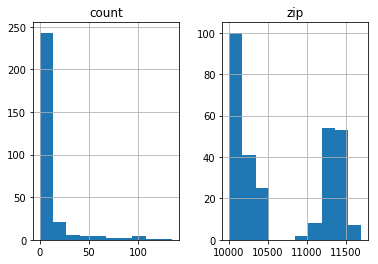

In [35]:
zipdf.hist()

In [28]:
zip_shapes = gpd.read_file('nyc_zips/nyc-zip-code-tabulation-areas-polygons.geojson')

In [17]:
len(zip_shapes)

262

In [18]:
len(NYZIPunique)

290

In [23]:
type(zip_shapes.zip[0])

str

In [24]:
zipdf.zip = str(zipdf.zip)

In [25]:
zip_shapes = zip_shapes.merge(zipdf, on = 'zip')

In [39]:
len(zipdf.zip.unique())

290

In [52]:
zipdf[zipdf['zip'] == 11377]

,count,zip
11377,8,11377


In [85]:
zip_shapes['count'] = 0
for zipcode, index in zip(zip_shapes.postalCode, zip_shapes.index):
    zip_shapes.loc[index, 'count'] = len(pc2015[pc2015['ZIP5'].astype(int).astype(str) == zipcode])

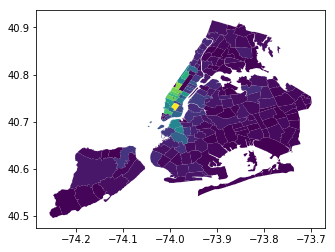

In [82]:
zip_shapes.plot(column = 'count')

In [75]:
pc2015['ZIP5'].astype(int).astype(str)

0       10011
1       11231
2       10024
3       11233
4       10025
5       10303
6       11215
7       10036
8       11223
9       10018
10      10028
11      11105
12      10023
13      10041
14      11201
15      10128
16      11215
17      10163
18      10003
19      11225
20      10013
21      11375
22      10011
23      10040
24      10004
25      10001
26      10001
27      11222
28      10003
29      10001
        ...  
2737    10029
2738    11212
2739    11210
2740    11356
2741    11434
2742    10464
2743    10019
2744    11229
2745    10163
2746    10017
2747    10013
2748    10025
2749    10023
2750    10463
2751    10014
2752    10004
2753    10013
2754    10312
2755    11101
2756    10014
2757    10025
2758    10075
2759    11372
2760    11211
2761    11101
2762    11434
2763    10019
2764    10019
2765    10024
2766    10004
Name: ZIP5, Length: 2767, dtype: object

In [86]:
zip_shapes['total_funding'] = 0
for zipcode, index in zip(zip_shapes.postalCode, zip_shapes.index):
    zip_shapes.loc[index, 'total_funding'] = sum(pc2015[pc2015['ZIP5'].astype(int).astype(str) == zipcode].TOTREV)

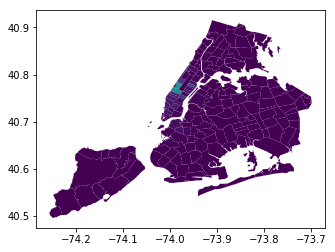

In [88]:
zip_shapes.plot(column = 'total_funding')

In [90]:
zip_shapes['med_funding'] = 0
for zipcode, index in zip(zip_shapes.postalCode, zip_shapes.index):
    zip_shapes.loc[index, 'med_funding'] = pc2015[pc2015['ZIP5'].astype(int).astype(str) == zipcode].TOTREV.median()

/home/steve/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/home/steve/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/home/steve/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


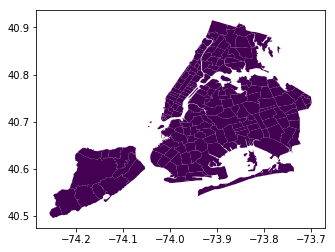

In [92]:
zip_shapes.plot(column = 'med_funding')

In [93]:
zip_shapes['total_funding_norm'] = (zip_shapes['total_funding'] - zip_shapes['total_funding'].mean())/zip_shapes['total_funding'].std()

In [96]:
zip_shapes['count_norm'] = (zip_shapes['count'] - zip_shapes['count'].mean())/zip_shapes['count'].std()

In [97]:
zip_shapes

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id,geometry,count,total_funding,med_funding,total_funding_norm,count_norm
0,1,11372,Jackson Heights,NY,Queens,36,081,0,20624.692317,2.016328e+07,http://nyc.pediacities.com/Resource/PostalCode...,POLYGON ((-73.86942457284175 40.74915687096787...,12,606465.0,41159.5,-0.183648,0.057201
1,2,11004,Glen Oaks,NY,Queens,36,081,0,23002.816039,2.260653e+07,http://nyc.pediacities.com/Resource/PostalCode...,POLYGON ((-73.71068374074007 40.75004039450917...,3,3027465.0,40152.0,-0.169589,-0.365621
2,3,11040,New Hyde Park,NY,Queens,36,081,0,15749.161511,6.269333e+06,http://nyc.pediacities.com/Resource/PostalCode...,POLYGON ((-73.70098278625547 40.73889569923034...,0,0.0,NaN,-0.187170,-0.506561
3,4,11426,Bellerose,NY,Queens,36,081,0,35932.810639,4.941836e+07,http://nyc.pediacities.com/Resource/PostalCode...,POLYGON ((-73.72270447144122 40.75373371438336...,2,98120.0,49060.0,-0.186600,-0.412601
4,5,11365,Fresh Meadows,NY,Queens,36,081,0,38693.565676,6.938587e+07,http://nyc.pediacities.com/Resource/PostalCode...,POLYGON ((-73.81088634744755 40.72717187575918...,8,902269.0,110283.0,-0.181930,-0.130720
5,6,11373,Elmhurst,NY,Queens,36,081,0,33755.870988,4.265940e+07,http://nyc.pediacities.com/Resource/PostalCode...,POLYGON ((-73.88722098467157 40.72752618766134...,7,716288.0,66081.0,-0.183010,-0.177700
6,7,11001,Floral Park,NY,Queens,36,081,0,13594.924549,9.155180e+06,http://nyc.pediacities.com/Resource/PostalCode...,POLYGON ((-73.70098278625547 40.73889569923034...,0,0.0,NaN,-0.187170,-0.506561
7,8,11375,Forest Hills,NY,Queens,36,081,0,36277.076839,5.558777e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.8562474640478 40.7367227854824, ...",8,434820.0,44517.5,-0.184645,-0.130720
8,9,11427,Queens Village,NY,Queens,36,081,0,31231.968593,3.956834e+07,http://nyc.pediacities.com/Resource/PostalCode...,POLYGON ((-73.74168681424477 40.73682340115314...,3,104950.0,150.0,-0.186560,-0.365621
9,10,11374,Rego Park,NY,Queens,36,081,0,26323.994393,2.520346e+07,http://nyc.pediacities.com/Resource/PostalCode...,POLYGON ((-73.86451198956482 40.73407164841783...,2,12748.0,6374.0,-0.187096,-0.412601


In [100]:
pc2015.loc[pc2015['ZIP5'] == 11427, ['NAME', 'TOTREV']]

,NAME,TOTREV
261,SOL ZIM JEWISH ENRICHMENT MUSIC FOUNDATION INC...,0.0
1183,LIGHT OF ASIA BROADCASTING CORPORATION,104800.0
2341,AGRAWAL ASSOCIATION OF NORTH AMERICA INC,150.0


In [127]:
from scipy.stats import logistic
zip_shapes['vibrancy'] = logistic.cdf(zip_shapes['count_norm'] + zip_shapes['total_funding_norm'])

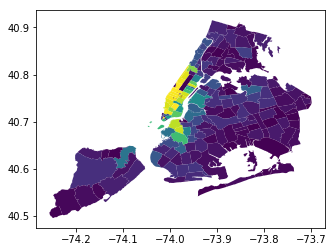

In [112]:
zip_shapes.plot(column = 'vibrancy')

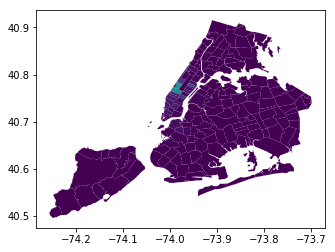

In [115]:
zip_shapes.plot(column = 'total_funding_norm')

In [118]:
zip_shapes['total_funding'] = 0
for zipcode, index in zip(zip_shapes.postalCode, zip_shapes.index):
    zip_shapes.loc[index, 'total_funding'] = sum(pc2015[(pc2015['ZIP5'].astype(int).astype(str) == zipcode) 
                                                        & (pc2015.TOTREV > pc2015.TOTREV.mean() - 2 * pc2015.TOTREV.std())
                                                        & (pc2015.TOTREV < pc2015.TOTREV.mean() + 2 * pc2015.TOTREV.std())].TOTREV)

In [120]:
zip_shapes['med_funding'] = 0
for zipcode, index in zip(zip_shapes.postalCode, zip_shapes.index):
    zip_shapes.loc[index, 'med_funding'] = pc2015[(pc2015['ZIP5'].astype(int).astype(str) == zipcode) 
                                                        & (pc2015.TOTREV > pc2015.TOTREV.mean() - 2 * pc2015.TOTREV.std())
                                                        & (pc2015.TOTREV < pc2015.TOTREV.mean() + 2 * pc2015.TOTREV.std())].TOTREV.median()

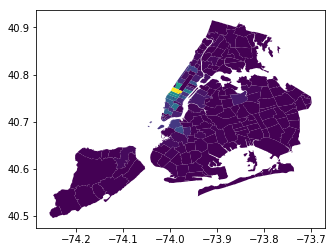

In [123]:
zip_shapes.plot(column = 'total_funding')

In [124]:
zip_shapes['total_funding_norm'] = (zip_shapes['total_funding'] - zip_shapes['total_funding'].mean())/zip_shapes['total_funding'].std()

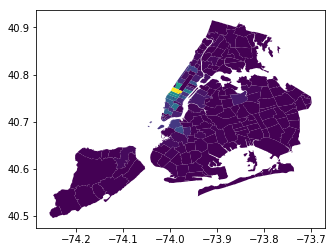

In [126]:
zip_shapes.plot(column = 'total_funding_norm')

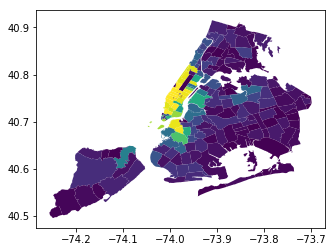

In [128]:
zip_shapes.plot(column = 'vibrancy')